### An online bookstore is looking to optimize its website design to improve user engagement and ultimately increase book purchases. The website currently offers two themes for its users: “Light Theme” and “Dark Theme.” The bookstore’s data science team wants to conduct an A/B testing experiment to determine which theme leads to better user engagement and higher conversion rates for book purchases.

##### The data collected by the bookstore contains user interactions and engagement metrics for both the Light Theme and Dark Theme. The dataset includes the following key features:

### Theme: dark or light
##### Click Through Rate: The proportion of the users who click on links or buttons on the website.
##### Conversion Rate: The percentage of users who signed up on the platform after visiting for the first time.
##### Bounce Rate: The percentage of users who leave the website without further interaction after visiting a single page.
##### Scroll Depth: The depth to which users scroll through the website pages.
##### Age: The age of the user.
##### Location: The location of the user.
##### Session Duration: The duration of the user’s session on the website.
##### Purchases: Whether the user purchased the book (Yes/No).
##### Added_to_Cart: Whether the user added books to the cart (Yes/No).

### Your task is to identify which theme, Light Theme or Dark Theme, yields better user engagement, purchases and conversion rates. You need to determine if there is a statistically significant difference in the key metrics between the two themes.

In [1]:
#IMPORTING THE LIBRARIES 
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats



In [2]:
#LOADING THE DATSET 
data = pd.read_csv(r"C:\Users\PJugantM\Downloads\website_ab_test.csv")
data.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


In [3]:
# Let’s have a look if the data has null values or not:
print(data.isnull().sum())

Theme                 0
Click Through Rate    0
Conversion Rate       0
Bounce Rate           0
Scroll_Depth          0
Age                   0
Location              0
Session_Duration      0
Purchases             0
Added_to_Cart         0
dtype: int64


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               1000 non-null   object 
 1   Click Through Rate  1000 non-null   float64
 2   Conversion Rate     1000 non-null   float64
 3   Bounce Rate         1000 non-null   float64
 4   Scroll_Depth        1000 non-null   float64
 5   Age                 1000 non-null   int64  
 6   Location            1000 non-null   object 
 7   Session_Duration    1000 non-null   int64  
 8   Purchases           1000 non-null   object 
 9   Added_to_Cart       1000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB
None


In [6]:
data.describe()

,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Session_Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.256048,0.253312,0.505758,50.319494,41.528000,924.999000
std,0.139265,0.139092,0.172195,16.895269,14.114334,508.231723
min,0.010767,0.010881,0.200720,20.011738,18.000000,38.000000
25%,0.140794,0.131564,0.353609,35.655167,29.000000,466.500000
50%,0.253715,0.252823,0.514049,51.130712,42.000000,931.000000
75%,0.370674,0.373040,0.648557,64.666258,54.000000,1375.250000
max,0.499989,0.498916,0.799658,79.997108,65.000000,1797.000000


In [13]:
data.columns

Index(['Theme', 'Click Through Rate', 'Conversion Rate', 'Bounce Rate',
       'Scroll_Depth', 'Age', 'Location', 'Session_Duration', 'Purchases',
       'Added_to_Cart'],
      dtype='object')

##### So conversion rate in this data means the daily percentage of users who signed up on the website. Let’s have a look at the relationship between CTR and conversion rate of both themes

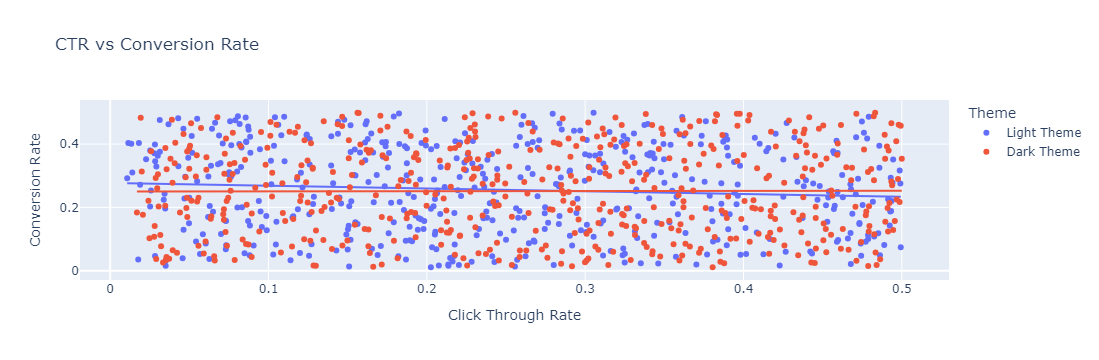

In [9]:
# Scatter plot for Click Through Rate and Conversion Rate
fig = px.scatter(data, x='Click Through Rate',
                 y='Conversion Rate', color='Theme',
                 title='CTR vs Conversion Rate', trendline='ols')
fig.show() 

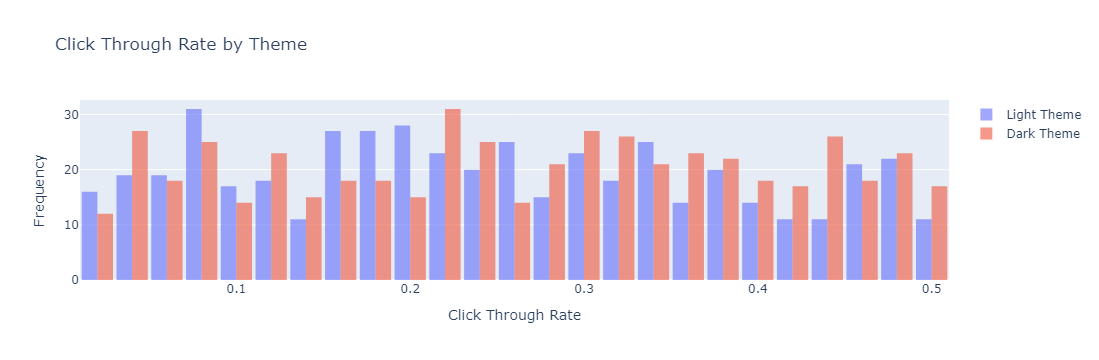

In [10]:
# Extract data for each theme
light_theme_data = data[data['Theme'] == 'Light Theme']
dark_theme_data = data[data['Theme'] == 'Dark Theme']

# Create grouped bar chart for Click Through Rate
fig = go.Figure()

fig.add_trace(go.Histogram(x=light_theme_data['Click Through Rate'], name='Light Theme', opacity=0.6))
fig.add_trace(go.Histogram(x=dark_theme_data['Click Through Rate'], name='Dark Theme', opacity=0.6))

fig.update_layout(
    title_text='Click Through Rate by Theme',
    xaxis_title_text='Click Through Rate',
    yaxis_title_text='Frequency',
    barmode='group',
    bargap=0.1
)

fig.show()

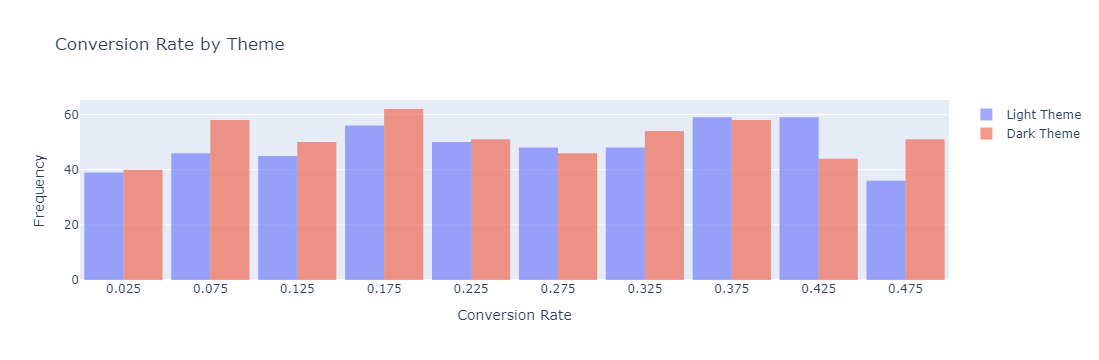

In [11]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=light_theme_data['Conversion Rate'], 
                           name='Light Theme', opacity=0.6, nbinsx=20))
fig.add_trace(go.Histogram(x=dark_theme_data['Conversion Rate'], 
                           name='Dark Theme', opacity=0.6, nbinsx=20))

fig.update_layout(
    title_text='Conversion Rate by Theme',
    xaxis_title_text='Conversion Rate',
    yaxis_title_text='Frequency',
    barmode='group',
    bargap=0.1
)

fig.show() 

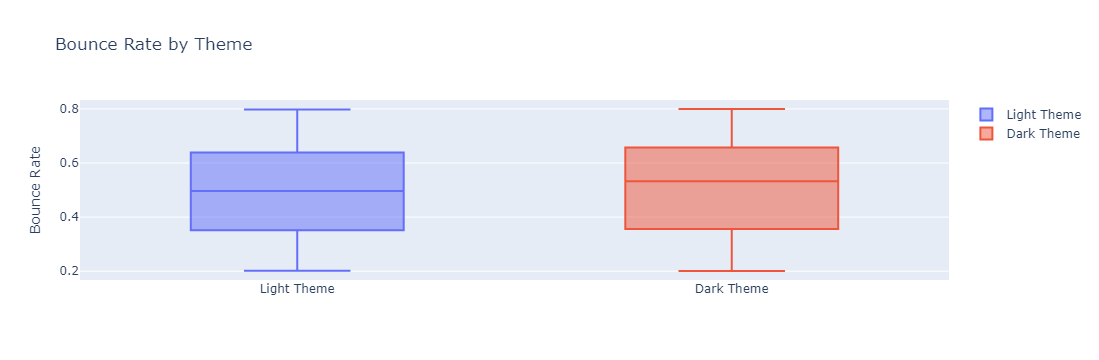

In [12]:
fig = go.Figure()
fig.add_trace(go.Box(y=light_theme_data['Bounce Rate'], 
                     name='Light Theme'))
fig.add_trace(go.Box(y=dark_theme_data['Bounce Rate'], 
                     name='Dark Theme'))

fig.update_layout(
    title_text='Bounce Rate by Theme',
    yaxis_title_text='Bounce Rate',
)

fig.show() 

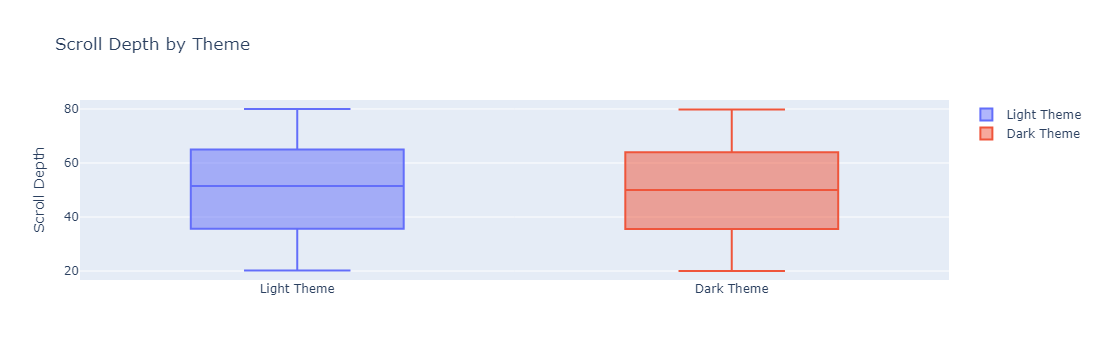

In [14]:
fig = go.Figure()
fig.add_trace(go.Box(y=light_theme_data['Scroll_Depth'], 
                     name='Light Theme'))
fig.add_trace(go.Box(y=dark_theme_data['Scroll_Depth'], 
                     name='Dark Theme'))

fig.update_layout(
    title_text='Scroll Depth by Theme',
    yaxis_title_text='Scroll Depth',
)

fig.show()

## Comparison of Both Themes based on Purchases


In [15]:
# A/B testing for Purchases
light_theme_conversions = light_theme_data[light_theme_data['Purchases'] == 'Yes'].shape[0]
light_theme_total = light_theme_data.shape[0]

dark_theme_conversions = dark_theme_data[dark_theme_data['Purchases'] == 'Yes'].shape[0]
dark_theme_total = dark_theme_data.shape[0]

conversion_counts = [light_theme_conversions, dark_theme_conversions]
sample_sizes = [light_theme_total, dark_theme_total]

light_theme_conversion_rate = light_theme_conversions / light_theme_total
dark_theme_conversion_rate = dark_theme_conversions / dark_theme_total

# Perform two-sample proportion test
zstat, pval = proportions_ztest(conversion_counts, sample_sizes)
print("Light Theme Conversion Rate:", light_theme_conversion_rate)
print("Dark Theme Conversion Rate:", dark_theme_conversion_rate)
print("A/B Testing - z-statistic:", zstat, " p-value:", pval)

Light Theme Conversion Rate: 0.5308641975308642
Dark Theme Conversion Rate: 0.5038910505836576
A/B Testing - z-statistic: 0.8531246206222649  p-value: 0.39359019934127804


## Comparison of Both Themes based on Session Duration

In [16]:
light_theme_session_duration = light_theme_data['Session_Duration']
dark_theme_session_duration = dark_theme_data['Session_Duration']

# Calculate the average session duration for both themes
light_theme_avg_duration = light_theme_session_duration.mean()
dark_theme_avg_duration = dark_theme_session_duration.mean()

# Print the average session duration for both themes
print("Light Theme Average Session Duration:", light_theme_avg_duration)
print("Dark Theme Average Session Duration:", dark_theme_avg_duration)

# Perform two-sample t-test for session duration
tstat, pval = stats.ttest_ind(light_theme_session_duration, dark_theme_session_duration)
print("A/B Testing for Session Duration - t-statistic:", tstat, " p-value:", pval)

Light Theme Average Session Duration: 930.8333333333334
Dark Theme Average Session Duration: 919.4824902723735
A/B Testing for Session Duration - t-statistic: 0.3528382474155483  p-value: 0.7242842138292167
